In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [4]:
 !kaggle datasets download abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:12<00:00, 228MB/s]
100% 2.04G/2.04G [00:12<00:00, 169MB/s]


In [5]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [6]:
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [7]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])


['color', 'segmented', 'grayscale']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Pepper,_bell___Bacterial_spot']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Pepper,_bell___Bacterial_spot']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Pepper,_bell___Bacterial_spot']


##no. of classes = 38

In [8]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['8a5dff69-180d-4a14-b8e1-b9e1374202c5___Mt.N.V_HL 6098.JPG', '6b11a8e2-a729-4f80-9836-e90402c0b47f___Mt.N.V_HL 6062.JPG', '07c7232b-5cdb-4bab-9413-e0108a48526f___Mt.N.V_HL 8957.JPG', '5a165993-9c98-476f-a818-0145dd33f18e___Mt.N.V_HL 8932.JPG', 'f8bb34c3-13a4-4762-a16d-79ec49823e3e___Mt.N.V_HL 8911.JPG']


In [9]:
base_dir = 'plantvillage dataset/color'

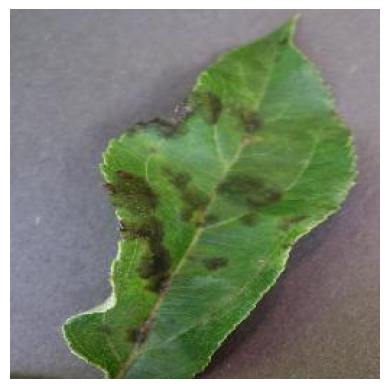

In [10]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab'


image_files = os.listdir(image_path)


if image_files:
    first_image_path = os.path.join(image_path, image_files[0])
    img = mpimg.imread(first_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No images found in the directory.")

In [11]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab'

img = mpimg.imread(first_image_path)
print(img)


[[[128 129 134]
  [130 131 136]
  [131 132 137]
  ...
  [149 142 149]
  [149 142 149]
  [149 142 149]]

 [[127 128 133]
  [128 129 134]
  [128 129 134]
  ...
  [150 143 150]
  [150 143 150]
  [149 142 149]]

 [[127 128 133]
  [127 128 133]
  [127 128 133]
  ...
  [152 145 152]
  [151 144 151]
  [150 143 150]]

 ...

 [[ 77  74  65]
  [ 78  76  64]
  [ 78  75  66]
  ...
  [106  94  80]
  [117 105  91]
  [127 115 101]]

 [[ 70  66  55]
  [ 72  68  56]
  [ 74  70  59]
  ...
  [105  93  79]
  [112 100  86]
  [119 107  93]]

 [[ 67  63  51]
  [ 70  66  54]
  [ 72  68  56]
  ...
  [114 102  88]
  [111  99  85]
  [106  94  80]]]


In [12]:
img_size = 150
batch_size = 32

In [13]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split=0.2)

In [14]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [15]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    21,233,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,263,078 (81.11 MB)

 Trainable params: 21,263,078 (81.11 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 68s 46ms/step - accuracy: 0.5871 - loss: 1.5915 - val_accuracy: 0.8567 - val_loss: 0.4535
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 61s 45ms/step - accuracy: 0.9017 - loss: 0.3098 - val_accuracy: 0.8753 - val_loss: 0.3949
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 64s 47ms/step - accuracy: 0.9549 - loss: 0.1334 - val_accuracy: 0.8949 - val_loss: 0.3557
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9753 - loss: 0.0776 - val_accuracy: 0.8847 - val_loss: 0.4588
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 62s 46ms/step - accuracy: 0.9827 - loss: 0.0547 - val_accuracy: 0.8892 - val_loss: 0.4776


In [20]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8928 - loss: 0.4604
Validation Accuracy: 88.93%


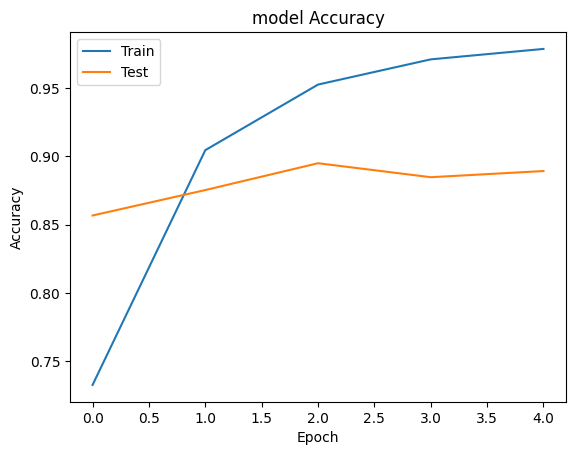

In [21]:
plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'],)
plt.title('model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

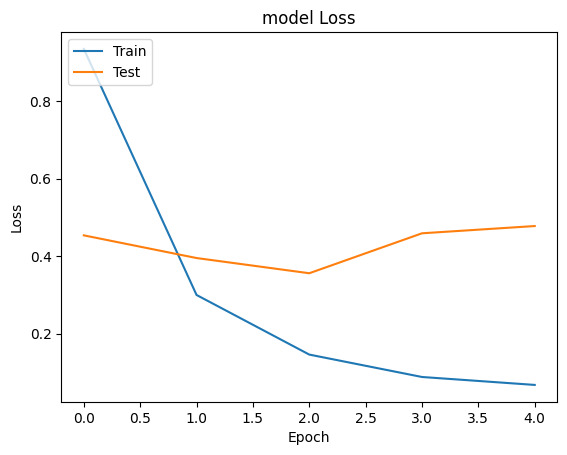

In [22]:
plt.plot(history.history['loss'], )
plt.plot(history.history['val_loss'],)
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [23]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):

    img = Image.open(image_path)

    img = img.resize(target_size)

    img_array = np.array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array.astype('float32') / 255.
    return img_array


def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = int(np.argmax(predictions, axis=1)[0])
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [24]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [25]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [26]:
class_indices_dict = dict(class_indices)
json.dump(class_indices_dict, open('class_indices.json', 'w'))

In [27]:
image_path = '/content/test_apple_black_rot.JPG'
predicted_class = predict_image_class(model, image_path, class_indices_dict)
print(f"The predicted class for the image is: {predicted_class}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/test_apple_black_rot.JPG'

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
model.save('/content/drive/MyDrive/plant_disease_model.h5')

In [30]:
model.save('plant_disease_model.h5')